 # Capstone Project - The Battle of Neighborhoods
 
 Peer-graded Assignment

# Introduction

The puropose of this Capstone Project is to compare the neighborhoods of the two major cities, New York and Toronto, and determine how similar or dissimilar they are. We will get to see the most common venues for both. Toronto and New York being the financial capital of Canada and the US respectively are one of the densely populated cities in the world. Both these cities see a lot of diversity resulting from the movement of a lot of immigrants from several parts of the world for work and settlement. These are one of the most immigrant-friendly cities, still different in so many aspects, which we are going to observe in this work.


The purpose of this whole exercise is for submission of the final capstone project for the "IBM Data Science" course on Coursera as well as to showcase my data science skills in the real-world application.


# Data and Problem solving strategy

The idea is to compare Toronto and the New York region for their similarities difference in terms of the most common venues they have. I will look into the number of cuisines, Restaurants, coffee shopsand other features in both cities as well as list down the 5 most common venues in both cities Neighborhood wise. The outcome of this study will help tourists and new immigrants have an overview of the common venues in both cities and chalk out the differences between both, which might further help them in their decision of travel or immigration choice. Then explore both cities by using Foursquare API and K-Clustering Approach and visualize the results separately.


Before we get the date and start exploring it, let's download all the dependencies that we will need

In [2]:
import pandas as pd # library for data analysis

from bs4 import BeautifulSoup  # library for pulling data out of HTML and XML files 
import requests # library to handle requests
import numpy as np # library to handle data in a vectorized manner
import random 

#Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans 
%matplotlib inline 

import json # library to handle JSON files

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# import k means from clustering stage
from sklearn.cluster import KMeans

! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 79 kB 7.5 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=15d0cf45e733607c31c6bac1f5407e2689b58b044799941394ea62ed23644c45
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Folium installed
Libraries imported.


###  Lets create a Data Frame for Canada, Toronto

In [3]:
Canada_PC =requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text
BSoup=BeautifulSoup(Canada_PC, 'html')
tab = str(BSoup.table)
dfs = pd.read_html(tab)
df=dfs[0]
# Dropping the rows where Borough is 'Not assigned'
df1 = df[df.Borough != 'Not assigned']

# Combining the neighbourhoods with same Postalcode
df2 = df1.groupby(['Postal Code','Borough'], sort= False).agg(', '.join)
df2.reset_index(inplace=True)
# Replacing the name of the neighbourhoods which are 'Not assigned' with names of Borough
df2['Neighbourhood'] = np.where(df2['Neighbourhood'] == 'Not assigned',df2['Borough'], df2['Neighbourhood'])
C_df= df2.rename(columns={"Neighbourhood":"Neighborhood"})
C_df.head(12)

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [4]:
print("Shape of the table above:",C_df.shape)

Shape of the table above: (103, 3)


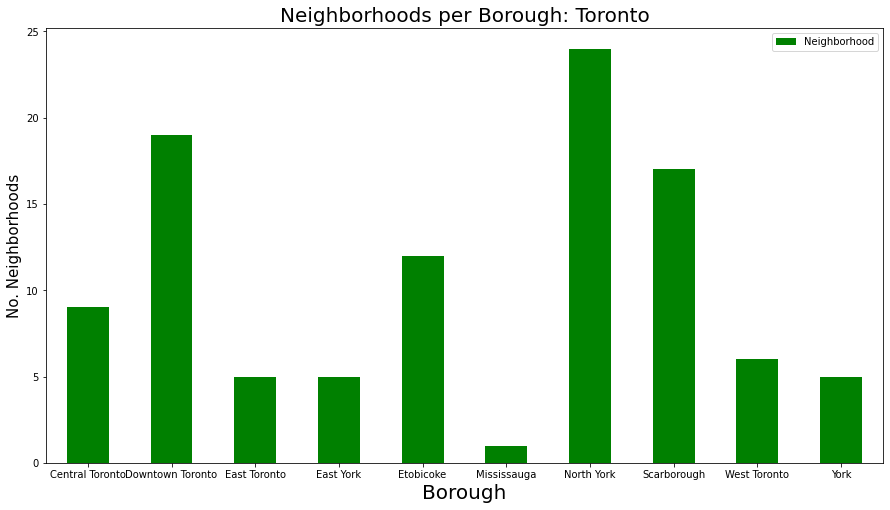

In [5]:
# Lets plot a graph for neighbor per Borough
clr = "green"
C_df.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(15,8), color=clr)
plt.title('Neighborhoods per Borough: Toronto', fontsize = 20)
plt.xlabel('Borough', fontsize = 20)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

### Lets create a Data Frame for New York City

In [6]:
NYork_PC =requests.get("https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm").text
BSoup=BeautifulSoup(NYork_PC, 'html')
tab_N = str(BSoup.table)
dfN = pd.read_html(tab_N)
df_N=dfN[0]
# Dropping the rows where Borough is 'Not assigned'
N_df = df_N[df_N.Borough != 'Not assigned']

# Combining the neighbourhoods with same Postalcode
NY_df = N_df.groupby(['ZIP Codes','Borough'], sort= False).agg(', '.join)
NY_df.reset_index(inplace=True)
# Replacing the name of the neighbourhoods which are 'Not assigned' with names of Borough
NY_df['Neighborhood'] = np.where(NY_df['Neighborhood'] == 'Not assigned',NY_df['Borough'], NY_df['Neighborhood'])

NY_df.head()

,ZIP Codes,Borough,Neighborhood
0,"10453, 10457, 10460",Bronx,Central Bronx
1,"10458, 10467, 10468",Bronx,Bronx Park and Fordham
2,"10451, 10452, 10456",Bronx,High Bridge and Morrisania
3,"10454, 10455, 10459, 10474",Bronx,Hunts Point and Mott Haven
4,"10463, 10471",Bronx,Kingsbridge and Riverdale


In [7]:
print("Shape of the table above:",NY_df.shape)

Shape of the table above: (42, 3)


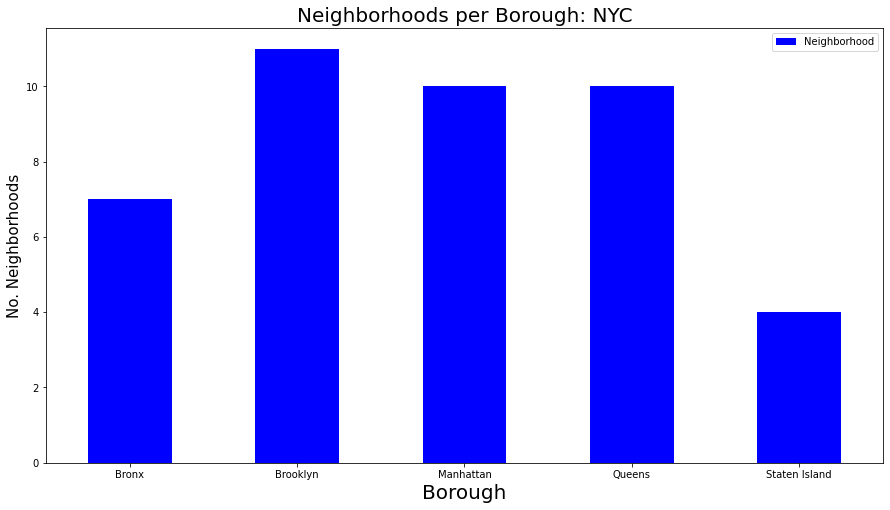

In [8]:
# Lets plot a graph for neighbor per Borough
clr = "blue"
NY_df.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(15,8), color=clr)
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 20)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

#### Lets Use the Geocoder csv file to create the following dataframe with coordinates of the neighborhoods 

In [9]:
Geospatial = pd.read_csv("http://cocl.us/Geospatial_data")
Geospatial.head()
Cdf = pd.merge(C_df , Geospatial, on ="Postal Code", how = "outer")
# Change the Postal Code to Postalcode
Cdf.rename(columns ={'Postal Code':'PostalCode'}, inplace = True)
Cdf.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


Download data for NY

In [10]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [11]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
    
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [12]:
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [13]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [14]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [15]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


# Explore and cluster the neighborhoods in Toronto and NewYork City

In [16]:
CLIENT_ID = 'YAWMB5WRVUZLYS2KD50IRDX4G2TO4PNLHW3XZWIJZS1C0LZP' # your Foursquare ID
CLIENT_SECRET = 'CXGGS3SKSMSLSKONG0ANBQQAO3YW2UQQBKQPVAI4N413ASAL' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YAWMB5WRVUZLYS2KD50IRDX4G2TO4PNLHW3XZWIJZS1C0LZP
CLIENT_SECRET:CXGGS3SKSMSLSKONG0ANBQQAO3YW2UQQBKQPVAI4N413ASAL


### Let's get the geographical coordinates of Toronto and New York City

In [17]:
address = 'Toronto, ON, Canada'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude_toronto = location.latitude
longitude_toronto = location.longitude
print("Toronto","Latitude",latitude_toronto, "& " "Longitude" ,longitude_toronto)

Toronto Latitude 43.6534817 & Longitude -79.3839347


In [18]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude_NYork = location.latitude
longitude_NYork = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude_NYork, longitude_NYork))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.

In [19]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude_NYork, longitude_NYork], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [20]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Cdf['Latitude'], Cdf['Longitude'], Cdf['Borough'], Cdf['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.75,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Exploring Neighborhoods in Toronto

In [21]:
def getNearbyVenues(names, latitudes_toronto, longitudes_toronto):
    
    radius=100
    LIMIT=30
    venues_list=[]
    for name, lat, lng in zip(names, latitudes_toronto, longitudes_toronto):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [22]:
#Listing Neighbourhood in Torocnto
toronto_venues = getNearbyVenues(names=Cdf['Neighborhood'],
                                   latitudes_toronto=Cdf['Latitude'],
                                   longitudes_toronto=Cdf['Longitude']
                                  )
toronto_venues.head()

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.654260,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
1,"Regent Park, Harbourfront",43.654260,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
2,"Regent Park, Harbourfront",43.654260,-79.360636,Sackville Playground,43.654656,-79.359871,Park
3,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,Roots,43.718214,-79.463893,Boutique
4,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,Suzy Shier,43.718846,-79.465906,Clothing Store


In [25]:
#Explosing Neighborhoods in New York city
def getNearbyVenues1(names, latitudes_NYork, longitudes_NYork,radius = 100):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes_NYork, longitudes_NYork):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [26]:
#Listing Neighbourhood in New York
NewYork_venues = getNearbyVenues1(names=neighborhoods['Neighborhood'],
                                   latitudes_NYork=neighborhoods['Latitude'],
                                   longitudes_NYork=neighborhoods['Longitude']
                                  )
NewYork_venues.head()

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kingsbridge,40.881687,-73.902818,Garden Gourmet Market,40.881350,-73.903389,Gourmet Shop
1,Kingsbridge,40.881687,-73.902818,MyUnique,40.881966,-73.903584,Thrift / Vintage Store
2,Kingsbridge,40.881687,-73.902818,Stop & Shop,40.882063,-73.902058,Supermarket
3,Kingsbridge,40.881687,-73.902818,Mattress Firm,40.881641,-73.903061,Mattress Store
4,Woodlawn,40.898273,-73.867315,Katonah Pizza and Pasta,40.898784,-73.867457,Pizza Place


In [27]:
toronto_venues.groupby('Neighborhood').count() # Number of venues for each neighbourhood.

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Bathurst Manor, Wilson Heights, Downsview North",3,3,3,3,3,3
"Bedford Park, Lawrence Manor East",3,3,3,3,3,3
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",1,1,1,1,1,1
Central Bay Street,3,3,3,3,3,3
"Commerce Court, Victoria Hotel",16,16,16,16,16,16
Davisville,9,9,9,9,9,9
Davisville North,1,1,1,1,1,1
Don Mills,2,2,2,2,2,2
"Fairview, Henry Farm, Oriole",2,2,2,2,2,2


In [28]:
NewYork_venues.groupby('Neighborhood').count() # Number of venues for each neighbourhood.

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allerton,3,3,3,3,3,3
Arlington,2,2,2,2,2,2
Astoria Heights,1,1,1,1,1,1
Battery Park City,5,5,5,5,5,5
Bay Ridge,11,11,11,11,11,11
...,...,...,...,...,...,...
Willowbrook,5,5,5,5,5,5
Windsor Terrace,1,1,1,1,1,1
Woodlawn,9,9,9,9,9,9


#### Now we will Analyze each Neighborhood in Toronto

In [29]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 
# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighborhood,American Restaurant,Art Gallery,Asian Restaurant,Bakery,Bank,Bar,Baseball Field,Beer Store,Bookstore,...,Sushi Restaurant,Taco Place,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Yoga Studio
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Lawrence Manor, Lawrence Heights",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Lawrence Manor, Lawrence Heights",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,American Restaurant,Art Gallery,Asian Restaurant,Bakery,Bank,Bar,Baseball Field,Beer Store,Bookstore,...,Sushi Restaurant,Taco Place,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Yoga Studio
0,"Bathurst Manor, Wilson Heights, Downsview North",0.0000,0.0000,0.000,0.000000,0.0,0.000,0.0,0.000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000
1,"Bedford Park, Lawrence Manor East",0.0000,0.0000,0.000,0.000000,0.0,0.000,0.0,0.000,0.0000,...,0.333333,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000
2,"CN Tower, King and Spadina, Railway Lands, Har...",0.0000,0.0000,0.000,0.000000,0.0,0.000,0.0,0.000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000
3,Central Bay Street,0.0000,0.0000,0.000,0.000000,0.0,0.000,0.0,0.000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000
4,"Commerce Court, Victoria Hotel",0.0625,0.0625,0.000,0.062500,0.0,0.000,0.0,0.000,0.0625,...,0.062500,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000
5,Davisville,0.0000,0.0000,0.000,0.000000,0.0,0.000,0.0,0.000,0.0000,...,0.111111,0.000000,0.000000,0.000000,0.0,0.0,0.111111,0.0,0.000000,0.000
6,Davisville North,0.0000,0.0000,0.000,0.000000,0.0,0.000,0.0,0.000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000
7,Don Mills,0.0000,0.0000,0.000,0.000000,0.0,0.000,0.5,0.000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000
8,"Fairview, Henry Farm, Oriole",0.0000,0.0000,0.000,0.000000,0.5,0.000,0.0,0.000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.5,0.0,0.000000,0.0,0.000000,0.000
9,"First Canadian Place, Underground city",0.0000,0.0000,0.000,0.083333,0.0,0.000,0.0,0.000,0.0000,...,0.000000,0.000000,0.000000,0.083333,0.0,0.0,0.000000,0.0,0.000000,0.000


In [31]:
NYork_onehot = pd.get_dummies(NewYork_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NYork_onehot['Neighborhood'] = NewYork_venues['Neighborhood'] 
# move neighborhood column to the first column
fixed_columns = [NYork_onehot.columns[-1]] + list(NYork_onehot.columns[:-1])
NYork_onehot = NYork_onehot[fixed_columns]

NYork_onehot.head()

,Yoga Studio,Accessories Store,Afghan Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Toy / Game Store,Trail,Train Station,Varenyky restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
NYork_grouped = NYork_onehot.groupby('Neighborhood').mean().reset_index()
NYork_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Toy / Game Store,Trail,Train Station,Varenyky restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,Allerton,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Arlington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Astoria Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Battery Park City,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bay Ridge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Willowbrook,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164,Windsor Terrace,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165,Woodlawn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,Woodside,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
print(toronto_onehot.shape)
print(NYork_onehot.shape)

(132, 72)
(801, 211)


### 5 Most Common venues in each Neighbourhood

In [34]:
def return_most_common_venues(row, T_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:T_top_venues]

In [35]:
T_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(T_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
T_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
T_neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    T_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], T_top_venues)

T_neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Fried Chicken Joint,Deli / Bodega,Yoga Studio,Dessert Shop
1,"Bedford Park, Lawrence Manor East",Sushi Restaurant,Coffee Shop,Italian Restaurant,Clothing Store,College Gym
2,"CN Tower, King and Spadina, Railway Lands, Har...",Performing Arts Venue,Yoga Studio,Gastropub,Coffee Shop,College Gym
3,Central Bay Street,Pharmacy,Sandwich Place,Coffee Shop,Yoga Studio,Clothing Store
4,"Commerce Court, Victoria Hotel",American Restaurant,Soup Place,Fast Food Restaurant,Deli / Bodega,Gym


In [36]:
toronto_venues.set_index('Neighborhood')
#('Venue').bar(figsize=(15,8))
#plt.show()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Regent Park, Harbourfront",43.654260,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
"Regent Park, Harbourfront",43.654260,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
"Regent Park, Harbourfront",43.654260,-79.360636,Sackville Playground,43.654656,-79.359871,Park
"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,Roots,43.718214,-79.463893,Boutique
"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,Suzy Shier,43.718846,-79.465906,Clothing Store
...,...,...,...,...,...,...
"First Canadian Place, Underground city",43.648429,-79.382280,Five Guys,43.648799,-79.381681,Burger Joint
"First Canadian Place, Underground city",43.648429,-79.382280,Ruby Thai (First Canadian Place),43.649091,-79.381600,Thai Restaurant
"First Canadian Place, Underground city",43.648429,-79.382280,Prairie Girl Bakery,43.648332,-79.382305,Cupcake Shop


In [37]:
def return_most_common_venues(row, NY_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:NY_top_venues]

In [38]:
NY_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(NY_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
NY_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
NY_neighborhoods_venues_sorted['Neighborhood'] = NYork_grouped['Neighborhood']

for ind in np.arange(NYork_grouped.shape[0]):
    NY_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(NYork_grouped.iloc[ind, :], NY_top_venues)

NY_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Allerton,Deli / Bodega,Gas Station,Donut Shop,Women's Store,Dog Run
1,Arlington,Construction & Landscaping,Bus Stop,Food,Filipino Restaurant,Fast Food Restaurant
2,Astoria Heights,Laundromat,Women's Store,Doctor's Office,Filipino Restaurant,Fast Food Restaurant
3,Battery Park City,Park,Boat or Ferry,Playground,Cooking School,Historic Site
4,Bay Ridge,Hookah Bar,Market,Pizza Place,Pool Hall,Chinese Restaurant


### Making Clusters for Neighbourhood

In [39]:
# set number of clusters
T_kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
T_kmeans = KMeans(n_clusters=T_kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
T_kmeans.labels_[0:10]

array([4, 4, 1, 1, 1, 1, 4, 4, 1, 1], dtype=int32)

In [40]:
# add clustering labels
T_neighborhoods_venues_sorted.insert(0, 'CA Cluster Labels', T_kmeans.labels_)

toronto_merged = Cdf

# merge toronto_grouped with Ndf to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(T_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
toronto_merged = toronto_merged.dropna()
toronto_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,CA Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1.0,Park,Breakfast Spot,Spa,Yoga Studio,Cupcake Shop
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,1.0,Clothing Store,Boutique,Yoga Studio,Coffee Shop,College Gym
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1.0,Sculpture Garden,Yoga Studio,Clothing Store,Coffee Shop,College Gym
7,M3B,North York,Don Mills,43.745906,-79.352188,4.0,Restaurant,Baseball Field,Yoga Studio,Dessert Shop,Coffee Shop
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,4.0,Art Gallery,Coffee Shop,Yoga Studio,Dessert Shop,College Gym


In [41]:
# set number of clusters
NY_kclusters = 5

NYork_grouped_clustering = NYork_grouped.drop('Neighborhood', 1)

# run k-means clustering
NY_kmeans = KMeans(n_clusters=NY_kclusters, random_state=0).fit(NYork_grouped_clustering)

# check cluster labels generated for each row in the dataframe
NY_kmeans.labels_[0:10]

array([2, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [42]:
# add clustering labels
NY_neighborhoods_venues_sorted.insert(0, 'NY Cluster Labels', NY_kmeans.labels_)

NYork_merged = neighborhoods

# merge toronto_grouped with Ndf to add latitude/longitude for each neighborhood
NYork_merged = NYork_merged.join(NY_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
NYork_merged = NYork_merged.dropna()
NYork_merged.head()

,Borough,Neighborhood,Latitude,Longitude,NY Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
5,Bronx,Kingsbridge,40.881687,-73.902818,0.0,Mattress Store,Supermarket,Thrift / Vintage Store,Gourmet Shop,Women's Store
7,Bronx,Woodlawn,40.898273,-73.867315,2.0,Pub,Deli / Bodega,Pizza Place,Bar,Pharmacy
8,Bronx,Norwood,40.877224,-73.879391,0.0,History Museum,Women's Store,Doctor's Office,Filipino Restaurant,Fast Food Restaurant
12,Bronx,City Island,40.847247,-73.786488,0.0,Pizza Place,Jewelry Store,French Restaurant,Frozen Yogurt Shop,Diner
15,Bronx,Morris Heights,40.847898,-73.919672,0.0,Convenience Store,Women's Store,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant


## Generate map to visualize neighbourhoods 

In [43]:
map_clusters_T = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=11)

# set color scheme for the clusters
x_T = np.arange(T_kclusters)
ys_T = [i + x_T + (i*x_T)**2 for i in range(T_kclusters)]
T_colors_array = cm.rainbow(np.linspace(0, 1, len(ys_T)))
T_rainbow = [colors.rgb2hex(i) for i in T_colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'],toronto_merged['CA Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color = T_rainbow[int(cluster)-1],
        fill=True,
        fill_color=T_rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters_T)
       
map_clusters_T

In [44]:
latitudes_NYork = 40.7127281
longitudes_NYork = -74.0060152
map_clusters_NY = folium.Map(location=[latitudes_NYork, longitudes_NYork], zoom_start=11)

# set color scheme for the clusters
x_NY = np.arange(NY_kclusters)
ys_NY = [i + x_NY + (i*x_NY)**2 for i in range(NY_kclusters)]
NY_colors_array = cm.rainbow(np.linspace(0, 1, len(ys_NY)))
NY_rainbow = [colors.rgb2hex(i) for i in NY_colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NYork_merged['Latitude'], NYork_merged['Longitude'], NYork_merged['Neighborhood'],NYork_merged['NY Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color = NY_rainbow[int(cluster)-1],
        fill=True,
        fill_color=NY_rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters_NY)
       
map_clusters_NY

In [45]:
toronto_merged.loc[toronto_merged['CA Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,CA Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
10,North York,0.0,Italian Restaurant,Yoga Studio,Gastropub,Coffee Shop,College Gym
96,Downtown Toronto,0.0,Italian Restaurant,Yoga Studio,Gastropub,Coffee Shop,College Gym


In [46]:
toronto_merged.loc[toronto_merged['CA Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,CA Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Downtown Toronto,1.0,Park,Breakfast Spot,Spa,Yoga Studio,Cupcake Shop
3,North York,1.0,Clothing Store,Boutique,Yoga Studio,Coffee Shop,College Gym
4,Downtown Toronto,1.0,Sculpture Garden,Yoga Studio,Clothing Store,Coffee Shop,College Gym
15,Downtown Toronto,1.0,Japanese Restaurant,Gay Bar,Diner,Breakfast Spot,Italian Restaurant
24,Downtown Toronto,1.0,Pharmacy,Sandwich Place,Coffee Shop,Yoga Studio,Clothing Store
27,North York,1.0,Fast Food Restaurant,Yoga Studio,Dessert Shop,Coffee Shop,College Gym
29,East York,1.0,Housing Development,Indian Restaurant,Coffee Shop,Sandwich Place,College Gym
30,Downtown Toronto,1.0,Garden,Coffee Shop,Vegetarian / Vegan Restaurant,Food Court,Japanese Restaurant
32,Scarborough,1.0,Playground,Yoga Studio,Gastropub,Coffee Shop,College Gym
33,North York,1.0,Theater,Bank,Yoga Studio,Dessert Shop,Coffee Shop


In [47]:
toronto_merged.loc[toronto_merged['CA Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,CA Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
19,East Toronto,2.0,Trail,Yoga Studio,Dessert Shop,Coffee Shop,College Gym


In [48]:
toronto_merged.loc[toronto_merged['CA Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,CA Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
83,Central Toronto,3.0,Park,Yoga Studio,Gastropub,Coffee Shop,College Gym
91,Downtown Toronto,3.0,Park,Yoga Studio,Gastropub,Coffee Shop,College Gym


In [49]:
toronto_merged.loc[toronto_merged['CA Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,CA Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
7,North York,4.0,Restaurant,Baseball Field,Yoga Studio,Dessert Shop,Coffee Shop
9,Downtown Toronto,4.0,Art Gallery,Coffee Shop,Yoga Studio,Dessert Shop,College Gym
13,North York,4.0,Restaurant,Baseball Field,Yoga Studio,Dessert Shop,Coffee Shop
28,North York,4.0,Coffee Shop,Fried Chicken Joint,Deli / Bodega,Yoga Studio,Dessert Shop
36,Downtown Toronto,4.0,Coffee Shop,Gym,Yoga Studio,Dessert Shop,College Gym
42,Downtown Toronto,4.0,Coffee Shop,Restaurant,Deli / Bodega,Gym,Cocktail Bar
55,North York,4.0,Sushi Restaurant,Coffee Shop,Italian Restaurant,Clothing Store,College Gym
67,Central Toronto,4.0,Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Gym
70,Etobicoke,4.0,Coffee Shop,Yoga Studio,Dessert Shop,College Gym,Concert Hall


In [50]:
NYork_merged.loc[NYork_merged['NY Cluster Labels'] == 0, NYork_merged.columns[[1] + list(range(5, NYork_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
5,Kingsbridge,Mattress Store,Supermarket,Thrift / Vintage Store,Gourmet Shop,Women's Store
8,Norwood,History Museum,Women's Store,Doctor's Office,Filipino Restaurant,Fast Food Restaurant
12,City Island,Pizza Place,Jewelry Store,French Restaurant,Frozen Yogurt Shop,Diner
15,Morris Heights,Convenience Store,Women's Store,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant
18,West Farms,Diner,Women's Store,Dog Run,Fish & Chips Shop,Filipino Restaurant
...,...,...,...,...,...,...
295,Highland Park,Gym / Fitness Center,Park,Women's Store,Discount Store,Fast Food Restaurant
300,Erasmus,Bar,Women's Store,Dog Run,Fish & Chips Shop,Filipino Restaurant
301,Hudson Yards,Pet Store,Women's Store,Doctor's Office,Filipino Restaurant,Fast Food Restaurant
302,Hammels,Beach,Women's Store,Dog Run,Fish & Chips Shop,Filipino Restaurant


In [51]:
NYork_merged.loc[NYork_merged['NY Cluster Labels'] == 1, NYork_merged.columns[[1] + list(range(5, NYork_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
64,Brooklyn Heights,Pharmacy,Women's Store,Doctor's Office,Filipino Restaurant,Fast Food Restaurant
77,Manhattan Beach,Ice Cream Shop,Bus Stop,Women's Store,Doctor's Office,Filipino Restaurant
161,Oakland Gardens,Wine Shop,Bus Stop,Food,Filipino Restaurant,Fast Food Restaurant
198,New Brighton,Bus Stop,Women's Store,Food,Filipino Restaurant,Fast Food Restaurant
227,Arlington,Construction & Landscaping,Bus Stop,Food,Filipino Restaurant,Fast Food Restaurant
246,Bulls Head,Pharmacy,Bus Stop,Women's Store,Doctor's Office,Fast Food Restaurant
262,Mill Basin,Pharmacy,Women's Store,Doctor's Office,Filipino Restaurant,Fast Food Restaurant
274,Tudor City,Bus Stop,Women's Store,Food,Filipino Restaurant,Fast Food Restaurant
286,Sandy Ground,Fish & Chips Shop,Bus Stop,Food,Filipino Restaurant,Fast Food Restaurant
305,Fox Hills,Bus Stop,Women's Store,Food,Filipino Restaurant,Fast Food Restaurant


In [52]:
NYork_merged.loc[NYork_merged['NY Cluster Labels'] == 2, NYork_merged.columns[[1] + list(range(5, NYork_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
7,Woodlawn,Pub,Deli / Bodega,Pizza Place,Bar,Pharmacy
16,Fordham,Deli / Bodega,Sandwich Place,Women's Store,Doctor's Office,Fast Food Restaurant
17,East Tremont,Café,Pizza Place,Women's Store,Fast Food Restaurant,Farmers Market
31,Westchester Square,Pizza Place,Fast Food Restaurant,Deli / Bodega,Latin American Restaurant,Sandwich Place
36,North Riverdale,Bank,Deli / Bodega,Dog Run,Women's Store,Fish & Chips Shop
44,Unionport,Pizza Place,Bar,Women's Store,Doctor's Office,Filipino Restaurant
62,Bushwick,Pizza Place,Mediterranean Restaurant,Coffee Shop,Thrift / Vintage Store,Deli / Bodega
78,Coney Island,Racetrack,Residential Building (Apartment / Condo),Deli / Bodega,Women's Store,Discount Store
83,Marine Park,Deli / Bodega,Cosmetics Shop,Indoor Play Area,Bar,Chinese Restaurant
119,Lower East Side,Pizza Place,Pool,Supermarket,Diner,Farmers Market


In [53]:
NYork_merged.loc[NYork_merged['NY Cluster Labels'] == 3, NYork_merged.columns[[1] + list(range(5, NYork_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
72,East New York,Deli / Bodega,Women's Store,Dog Run,Fish & Chips Shop,Filipino Restaurant
140,Sunnyside,Deli / Bodega,Women's Store,Dog Run,Fish & Chips Shop,Filipino Restaurant
193,Brookville,Deli / Bodega,Women's Store,Dog Run,Fish & Chips Shop,Filipino Restaurant
220,Sunnyside,Deli / Bodega,Women's Store,Dog Run,Fish & Chips Shop,Filipino Restaurant


In [54]:
NYork_merged.loc[NYork_merged['NY Cluster Labels'] == 4, NYork_merged.columns[[1] + list(range(5, NYork_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
26,Soundview,Convenience Store,Chinese Restaurant,Grocery Store,Doctor's Office,Filipino Restaurant
41,Olinville,Food,Caribbean Restaurant,Chinese Restaurant,Pizza Place,Historic Site
43,Concourse,Chinese Restaurant,Bus Station,Women's Store,Dog Run,Filipino Restaurant
56,East Flatbush,Pharmacy,Supermarket,Moving Target,Chinese Restaurant,Caribbean Restaurant
65,Cobble Hill,Pilates Studio,Argentinian Restaurant,Coffee Shop,Chinese Restaurant,Women's Store
109,Lenox Hill,Wine Shop,Afghan Restaurant,French Restaurant,Bubble Tea Shop,Chinese Restaurant
114,Midtown,Historic Site,Mediterranean Restaurant,Greek Restaurant,Chinese Restaurant,Women's Store
170,Far Rockaway,Metro Station,Mobile Phone Shop,Chinese Restaurant,Women's Store,Dog Run
184,Queensboro Hill,Chinese Restaurant,Women's Store,Doctor's Office,Filipino Restaurant,Fast Food Restaurant
223,Rugby,Chinese Restaurant,Women's Store,Doctor's Office,Filipino Restaurant,Fast Food Restaurant


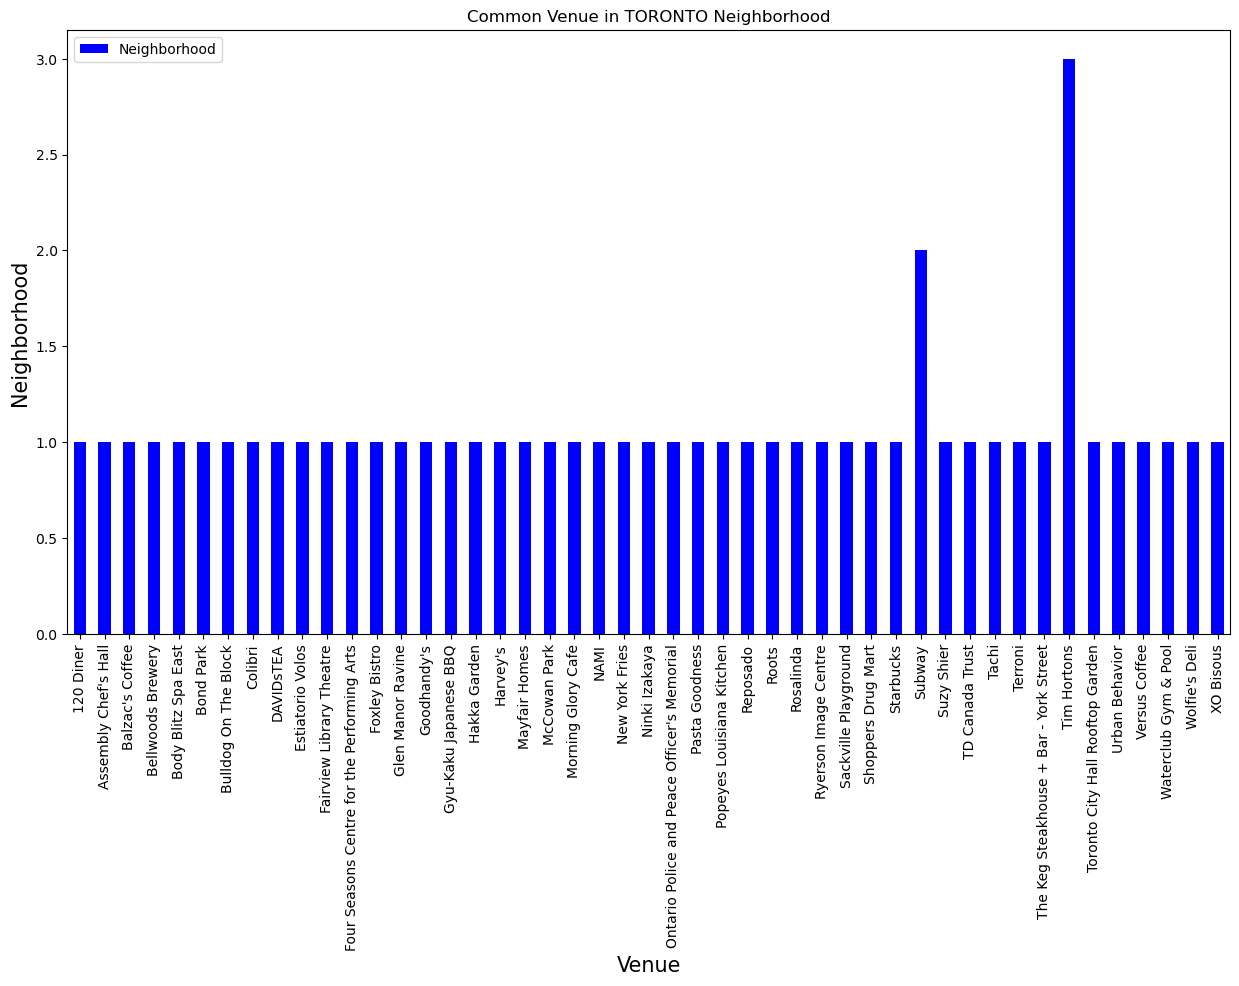

In [55]:
Tor = toronto_venues.head(50)[['Venue','Neighborhood']]
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Common Venue in TORONTO Neighborhood')
plt.xlabel('Venue', fontsize = 15)
plt.ylabel('Neighborhood', fontsize=15)
Tor.groupby('Venue')['Neighborhood'].count().plot.bar(figsize=(15,8), color=clr)
plt.legend()
plt.show()

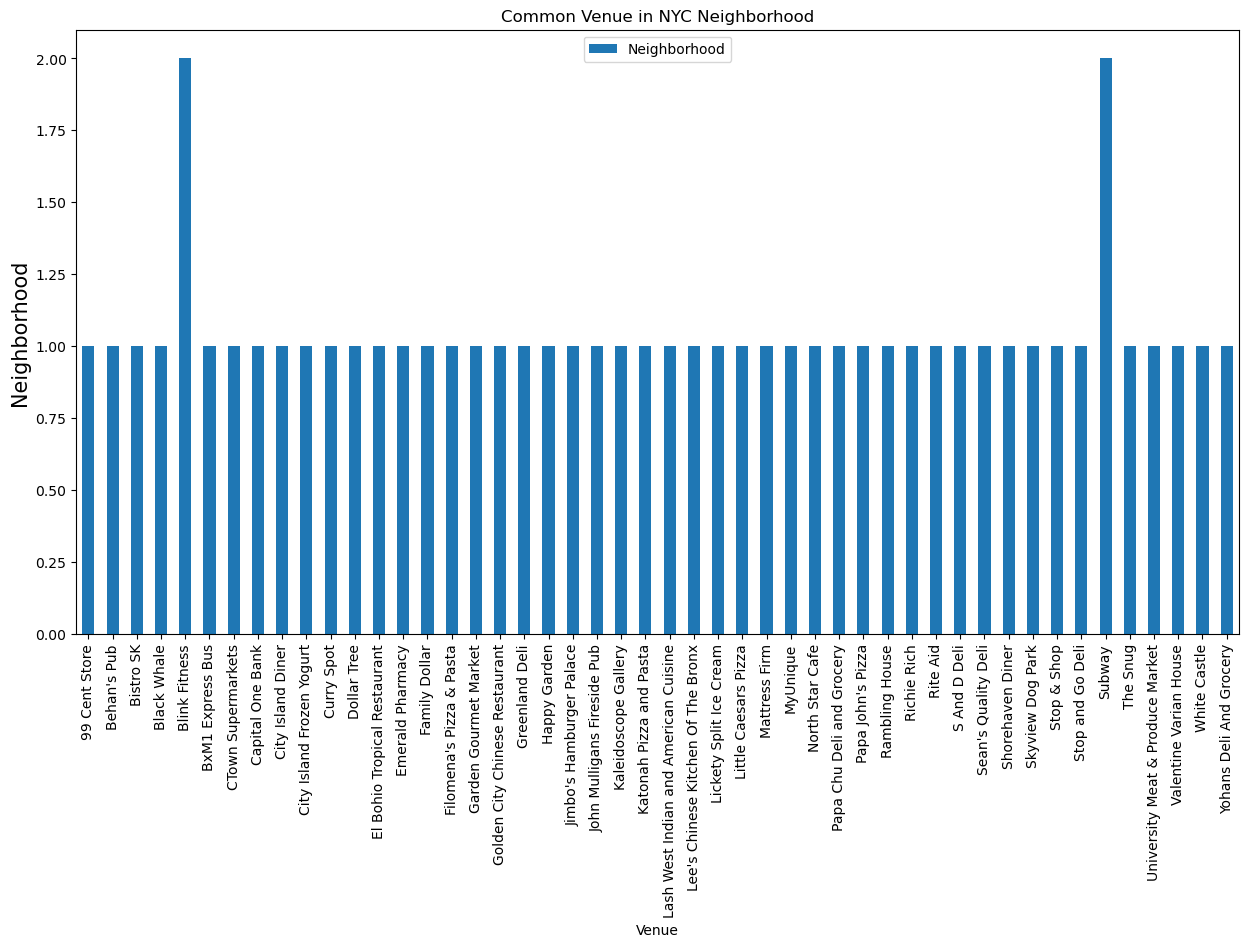

In [56]:
NY = NewYork_venues.head(50)[['Neighborhood','Venue']]
plt.figure(figsize=(10,5), dpi = 100)
plt.title('Common Venue in NYC Neighborhood')
plt.xlabel('Venue', fontsize = 10)
plt.ylabel('Neighborhood', fontsize=15)
NY.groupby('Venue')['Neighborhood'].count().plot.bar(figsize=(15,8))
plt.legend()
plt.show()

,Venue,Neighborhood_x,Neighborhood_y
0,Subway,Central Bay Street,Fordham
1,Subway,Central Bay Street,Westchester Square
2,Subway,Central Bay Street,Kensington
3,Subway,Central Bay Street,Inwood
4,Subway,Thorncliffe Park,Fordham
5,Subway,Thorncliffe Park,Westchester Square
6,Subway,Thorncliffe Park,Kensington
7,Subway,Thorncliffe Park,Inwood
8,Subway,"Steeles West, L'Amoreaux West",Fordham
9,Subway,"Steeles West, L'Amoreaux West",Westchester Square


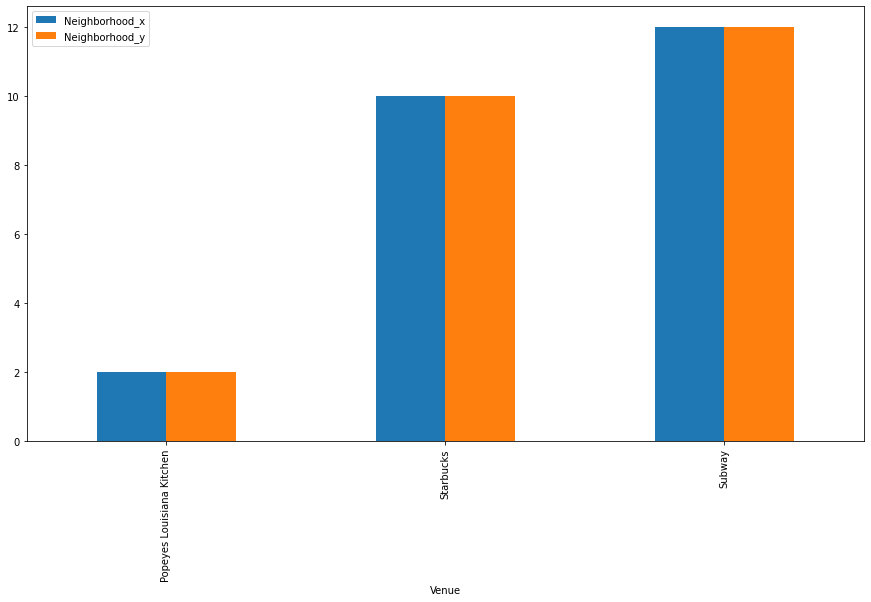

In [72]:
Tor = toronto_venues[['Venue','Neighborhood']]
NY = NewYork_venues[['Neighborhood','Venue']]
Tor_NY=pd.merge(Tor,NY, on = 'Venue')
Tor_NY.set_index('Venue')
Tor_NY.groupby('Venue').count().plot.bar(figsize=(15,8))
Tor_NY.rename(columns={"Neighbourhood_x":"CA Neighborhood"})
Tor_NY

# Conclusion
After doing K Clustering, it appeared that Italian Food, Deli/Bodega, fastfood Restaurant and many other places were in common in both Toronto and NewYork City neighborhoods. However, the most common venues are Popyes, Starbucks and Subway. As we know that every place is unique in its own way, so that’s argument is present in both neighborhoods. The dissimilarity exists in terms of some different venues and facilities but not on a larger extent.